In [2]:
# 단어빈도분석 : 전체 문서 또는 문서별 단어의 출현 빈도

f = open("c:/data/text/warandpeace.txt", encoding="utf-8")
lines = f.readlines()
f.close()
print(lines[1][:500])

The Project Gutenberg eBook of War and Peace, by Leo Tolstoy



In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# 숫자,특수문자 제거
tokenizer = RegexpTokenizer("[\w]+")
# 불용어 사전
stop_words = stopwords.words("english")
# 모든 단어를 소문자로 변환
words = ""
for line in lines:
    words += line.lower()
# print(words)
# 단어 단위로 토큰화
tokens = tokenizer.tokenize(words)
# 불용어 제거
tokens2 = [i for i in list(tokens) if not i in stop_words]
# 글자수 1인 단어들 제거
tokens3 = [i for i in tokens2 if len(i) > 1]

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_8100\913693610.py:5: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer("[\w]+")


In [4]:
import pandas as pd

# 출현 빈도가 높은 단어들
pd.Series(tokens3).value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_8100\3728779953.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


said       2842
one        2134
pierre     1963
prince     1929
would      1366
natásha    1213
man        1189
andrew     1144
could      1116
time        929
Name: count, dtype: int64

Counter({'said': 2842, 'one': 2134, 'pierre': 1963, 'prince': 1929, 'would': 1366, 'natásha': 1213, 'man': 1189, 'andrew': 1144, 'could': 1116, 'time': 929, 'princess': 916, 'face': 893, 'french': 881, 'went': 862, 'know': 847, 'old': 835, 'eyes': 827, 'men': 792, 'rostóv': 776, 'room': 771, 'thought': 767, 'go': 755, 'like': 751, 'well': 746, 'see': 734, 'chapter': 732, 'count': 726, 'moscow': 722, 'began': 718, 'come': 684, 'came': 683, 'still': 676, 'without': 675, 'asked': 668, 'mary': 668, 'army': 665, 'looked': 651, 'say': 640, 'first': 633, 'nicholas': 633, 'emperor': 631, 'felt': 631, 'another': 620, 'life': 618, 'away': 617, 'left': 611, 'something': 601, 'two': 595, 'seemed': 583, 'napoleon': 578, 'head': 568, 'day': 567, 'yes': 561, 'people': 560, 'little': 557, 'long': 545, 'hand': 541, 'whole': 532, 'kutúzov': 529, 'back': 520, 'even': 512, 'general': 506, 'heard': 498, 'good': 497, 'way': 494, 'countess': 488, 'must': 482, 'look': 475, 'nothing': 473, 'always': 464, 'saw'

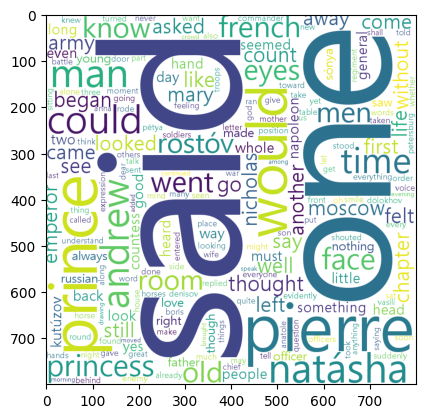

In [5]:
# 워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# 폰트 경로, 워드클라우드의 가로,세로 사이즈
wordcloud = WordCloud(
    font_path="c:/windows/fonts/malgun.ttf",
    width=800,
    height=800,
    background_color="white",
)

# 단어별 출현횟수 저장
count = Counter(tokens3)
print(count)

wordcloud = wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()

In [7]:
# 뉴스 기사를 하나 찾아서 news1.txt로 저장
f = open("c:/data/text/news1.txt")
lines = f.readlines()
f.close()

In [8]:
# 한나눔 형태소 분석기
from konlpy.tag import Hannanum

han = Hannanum()
temp = []

for i in range(len(lines)):
    # 명사만 추출
    a = lines[i].strip()
    temp.append(han.nouns(a))

In [9]:
# 2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList = []
    for elem in items:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList


word_list = flatten(temp)

# 두글자 이상인 단어만 추출
word_list = pd.Series([x for x in word_list if len(x) > 1])
# 단어별 출현 빈도
word_list.value_counts().head(10)

드론      13
배송       9
물놀이장     6
서비스      5
배달점      5
성남시      5
탄천       4
유료       3
이용       3
상용화      3
Name: count, dtype: int64

In [10]:
# 불용어 처리
stopwords = ["전날", "오전"]
word_list2 = [i for i in word_list if i not in stopwords]

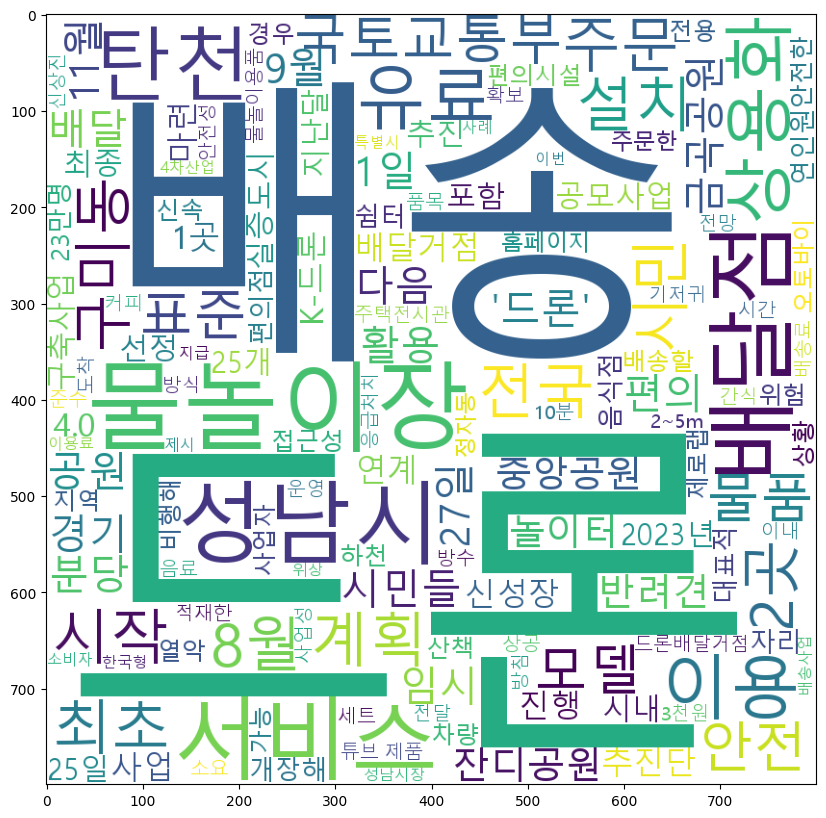

In [11]:
# 한글 뉴스를 워드클라우드로 출력
from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path="c:/windows/fonts/malgun.ttf",
    width=800,
    height=800,
    background_color="white",
)

import matplotlib.pyplot as plt

count = Counter(word_list2)
wordcloud = wordcloud.generate_from_frequencies(count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()